14.791358930041138


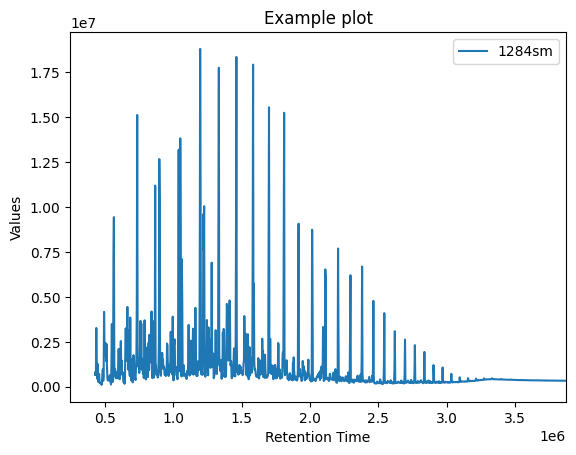

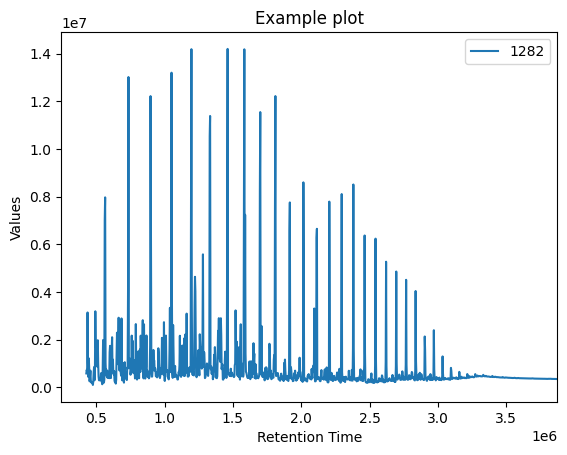

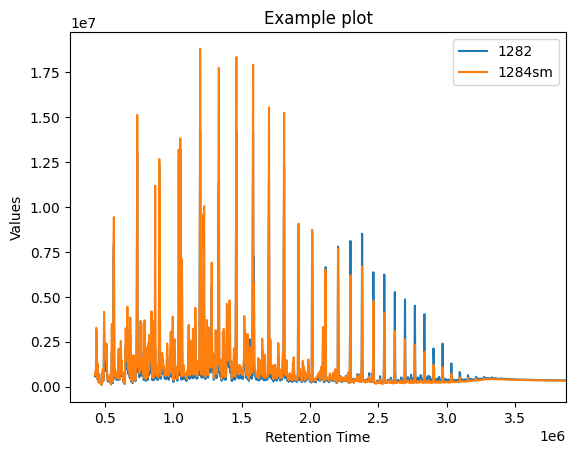

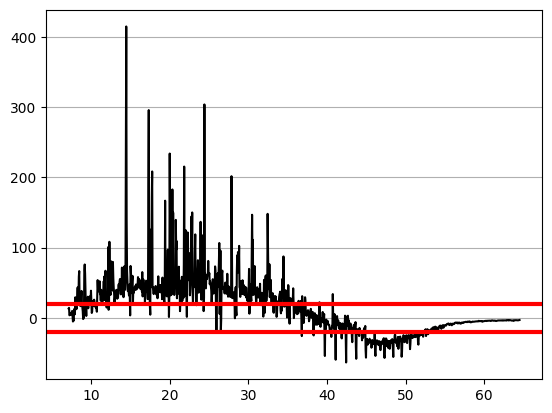

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
#function to get the closest matching number from a list K = number to find lst = list to search
def closest(lst, K):
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]

#function to draw graph
def getNCalcGraph(fileName=[r"C:\Users\zanyi\OneDrive\Git hub\Python\1282.csv",r"C:\Users\zanyi\OneDrive\Git hub\Python\1284sm.csv"], 
                  savePosition=r"C:\Users\zanyi\OneDrive\Git hub\Python", saveas="testing.png", RoundDigit = 3):
    fig, ax = plt.subplots()
    saves = []
    #repeat this loop until all file(name/directory up here^^^) is completed
    for names in fileName:
        df = pd.read_csv(names)
        retentionTime = df.iloc[:,0].to_list() #get retention time of dataset
        temp = retentionTime[0] #should not be important
        rn  = 0  #should not be important
        summsIndex=[] #
        Rtime=[] #
        last=0 #
        # get values in periods of 3000 ms
        for i in range(len(retentionTime)):
            rn = retentionTime[i]
            if rn-temp > 3000:
                temp = retentionTime[i-1]
                Rtime.append(temp)
                summsIndex.append([last,i]) #the indexes of the segments of value (3000ms each rn)
                last = i
        Data = df.iloc[:,3].to_list() #get intensity data from csv
        rsum=[] #sum of each 3000ms segment
        for segment in summsIndex:
            fsum=0
            pts=Data[segment[0]:segment[1]]
            for items in pts:
                fsum+=items
            rsum.append(round(fsum,RoundDigit))

        #cut down the list until 245000 ms later
        cutIndex = Rtime.index(closest(Rtime, 245000))
        cutx = list(Rtime[cutIndex :len(Rtime)-1])
        cuty = list(rsum[cutIndex:len(rsum)-1])
        ax.plot(cutx,cuty, label=f"{Path(names).stem}")
        saves.append(cuty) #save down the cut intensity value

    ax.set_title('Example plot') #title
    ax.set_xlabel('Retention Time') #x label
    ax.set_ylabel('Values') #y label
    plt.xlim([245000, max(Rtime)]) #set x line
    ax.legend() #show legend
    plt.savefig(savePosition + "/" + saveas) #save graph
    return [saves, cutx] #return intensity value & the retention time value

def getDifference(saves,cutx): #get percentage difference from 2 graph & plot them
    log = [] #variable to take down percentage difference
    diff = 0
    for ind in range(len(cutx)): #go through all values after 245000ms & calculate difference
        diff=round(((saves[1][ind]-saves[0][ind])/saves[0][ind])*100,4)
        log.append(diff) #store difference

    plt.figure() #start plotting the difference

    for ind,i in enumerate(cutx): #convert milisecond to minutes
        cutx[ind] = i/60000

    plt.plot(cutx, log,color="Black")
    plt.axhline(y = 20, color = 'red', linestyle = '-', linewidth = 3) #draw 20 line
    plt.axhline(y = -20, color = 'red', linestyle = '-', linewidth = 3) #draw -20 line
    plt.grid(axis='y') #draw grid
    return log #return differance between 2 graphs

getNCalcGraph([r"C:\Users\zanyi\OneDrive\Git hub\Python\1284sm.csv"])#show graph
getNCalcGraph([r"C:\Users\zanyi\OneDrive\Git hub\Python\1282.csv"])#show graph
l = getNCalcGraph()#show combined graph
s = getDifference(l[0],l[1])#show percentage difference graph

sum2 = 0
for i in s:
    sum2 += i
print(sum2/len(l[1])) #show total graph difference

plt.show()

In [278]:
#havent done
#check if graphs are different or not
def decideDifference(time,saves):
    IndexToSave = time.index(closest(time,40)) #get the index of the value after 40 minute
    SavedIndex = 0


    for unit in range(IndexToSave,len(saves[0])): #from index after 40 minute  to   the last item of the list
        SavedIndex += ((saves[1][unit]-saves[0][unit])/saves[0][unit])


    SavedIndex2 = 0
    IndexToSave = time.index(closest(time,30)) #get the index of the value after 30 minute

    for unit2 in range(0,IndexToSave): #from index 0   to   index after 30 minute
        SavedIndex2 += ((saves[1][unit2]-saves[0][unit2])/saves[0][unit2])

    print(f"Percentage difference after 40 minute: {SavedIndex/len(saves[0])*100}")
    print(f"Percentage difference before 30 minute: {SavedIndex2/len(saves[0])*100}")

decideDifference(time=l[1], saves=l[0])


Percentage difference after 40 minute: -7.2504169451523675
Percentage difference before 30 minute: 18.235914593005287
